<hr />

## Tutorial on Random forests

<hr />

# Random Forests

1. Regression
2. Classification

### Random Forests for Classification

# Two moon data

In [1]:
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=500, shuffle=True, noise=0.25, random_state=None)

In [3]:
import pandas as pd
import numpy as np

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [4]:
X.head()

,0,1
0,0.831773,0.039806
1,0.777948,0.029456
2,-0.665189,0.444295
3,0.559828,0.649890
4,0.141119,-0.704724


In [5]:
import matplotlib.pyplot as plt

In [6]:
index_class_0 = y[y[0]==0].index
index_class_1 = y[y[0]==1].index

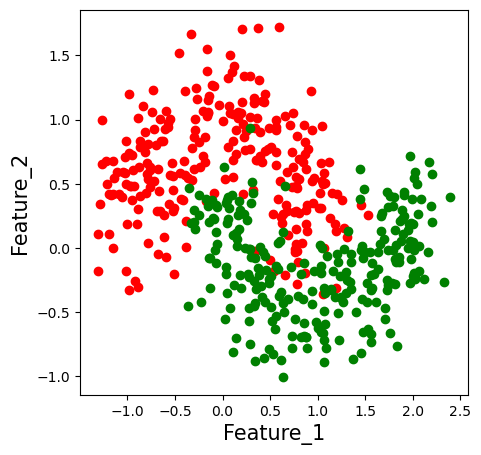

In [7]:
plt.figure(figsize = (5,5))
plt.scatter(X[0].iloc[index_class_0], X[1].iloc[index_class_0], color='red')
plt.scatter(X[0].iloc[index_class_1], X[1].iloc[index_class_1], color='green')
plt.xlabel("Feature_1", fontdict={"size": 15})
plt.ylabel("Feature_2", fontdict={"size": 15})
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Fitting a Decision tree Classifier model

In [10]:
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=1)

In [11]:
y_pred = DT_model.predict(X_test)

In [12]:
report = classification_report(y_pred, y_test.astype(int))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.94      0.91      0.92       101

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [13]:
confusion_matrix(y_pred, y_test.astype(int))

array([[93,  6],
       [ 9, 92]])

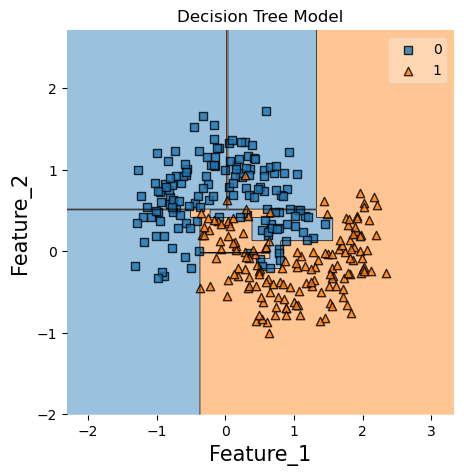

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(5,5))                               
fig = plot_decision_regions(X=X_train.values, y = y_train.values.ravel(),
                                clf=DT_model)

plt.xlabel("Feature_1", fontdict={"size": 15})
plt.ylabel("Feature_2", fontdict={"size": 15})
plt.title("Decision Tree Model")
plt.show()

# Fitting a Random Forest Classifier model

In [15]:
forest_model = RandomForestClassifier(random_state=42, n_estimators=25, oob_score=True, bootstrap=True)
forest_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=25, oob_score=True, random_state=42)

In [16]:
y_pred = forest_model.predict(X_test)

In [17]:
report = classification_report(y_test.astype(int), y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       102
           1       0.90      0.99      0.94        98

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [18]:
confusion_matrix(y_test.astype(int), y_pred)

array([[91, 11],
       [ 1, 97]])

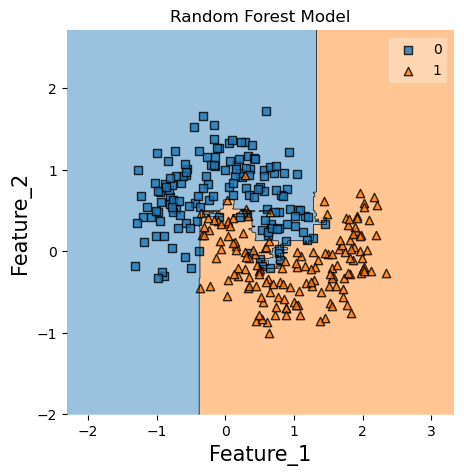

In [19]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(5,5))                               
fig = plot_decision_regions(X=X_train.values, y = y_train.values.ravel(),
                                clf=forest_model)

plt.xlabel("Feature_1", fontdict={"size": 15})
plt.ylabel("Feature_2", fontdict={"size": 15})
plt.title("Random Forest Model")
plt.show()

In [20]:
forest_model.oob_score_

0.9266666666666666

# Sampling with and without replacement

In [21]:
def sampling_with_replacement(data, weights, num_of_samples, seed):
    sample = data.sample(num_of_samples, replace = True, weights = weights, random_state=seed)
    return sample.reset_index(drop=True)

In [22]:
def sampling_without_replacement(data, weights, num_of_samples, seed):
    sample = data.sample(num_of_samples, replace = False, weights = weights, random_state=seed)
    return sample.reset_index(drop=True)

In [23]:
X, y = make_moons(n_samples=10000, shuffle=True, noise=0.25, random_state=None)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
dataset = pd.concat([X, y], axis = 1)
dataset.columns = ["feature_1", "feature_2", "target"]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  10000 non-null  float64
 1   feature_2  10000 non-null  float64
 2   target     10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [24]:
def oob_sample_counts(num_iter):

    sum = 0

    for i in range(0,num_iter):
        sample = sampling_with_replacement(data=dataset, weights=None, num_of_samples=len(dataset), seed=None)
        df_all = dataset.merge(sample, on=["feature_1", "feature_2", "target"], 
                    how='left', indicator=True)
        sum += df_all["_merge"].value_counts()["left_only"]

    return (sum/num_iter)/10000

In [25]:
oob_sample_counts(100)

0.36785300000000004

## bootstrap: bool, default=True
#### Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#### The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

## max_samples: int or float, default=None
#### If bootstrap is True, the number of samples to draw from X to train each base estimator.

#### If None (default), then draw X.shape[0] samples.

#### If int, then draw max_samples samples.

#### If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0.0, 1.0].

In [26]:
forest_model = RandomForestClassifier(random_state=42, n_estimators=25, oob_score=True, bootstrap=True, max_samples=100)
forest_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_samples=100, n_estimators=25, oob_score=True,
                       random_state=42)

In [27]:
y_pred = forest_model.predict(X_test)

In [28]:
report = classification_report(y_test.astype(int), y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       102
           1       0.92      1.00      0.96        98

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



In [29]:
confusion_matrix(y_pred, y_test.astype(int))

array([[93,  0],
       [ 9, 98]])

In [30]:
forest_model.oob_score_

0.9366666666666666

## warm_start: bool, default=False
#### When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

In [31]:
forest_model = RandomForestClassifier(random_state=42, n_estimators=25, warm_start= True, oob_score=True)
forest_model.fit(X_train.iloc[0:100], y_train.iloc[0:100].values.ravel())

RandomForestClassifier(n_estimators=25, oob_score=True, random_state=42,
                       warm_start=True)

In [32]:
forest_model.n_estimators

25

In [33]:
forest_model.n_estimators += 25
forest_model.fit(X_train.iloc[100:-1], y_train.iloc[100:-1].values.ravel()) 

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42,
                       warm_start=True)

In [34]:
forest_model.n_estimators

50

In [35]:
forest_model.oob_score_

0.9246231155778895

# BaggingClassifier

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=25, random_state=42, oob_score = True)
model.fit(X_train, y_train.values.ravel())

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=25,
                  oob_score=True, random_state=42)

In [38]:
model.n_estimators

25

In [39]:
y_pred = model.predict(X_test)

In [40]:
report = classification_report(y_test.astype(int), y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.90      0.95      0.93        98

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [41]:
confusion_matrix(y_pred, y_test.astype(int))

array([[92,  5],
       [10, 93]])

# VotingClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [43]:
# Training classifiers
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier(n_neighbors=10)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)

In [44]:
from sklearn.ensemble import VotingClassifier

In [45]:
model = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

In [46]:
model.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

In [47]:
y_pred = model.predict(X_test)

In [48]:
report = classification_report(y_test.astype(int), y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.91      0.94      0.92        98

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [49]:
confusion_matrix(y_pred, y_test.astype(int))

array([[93,  6],
       [ 9, 92]])